# Utils

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore all warnings
warnings.filterwarnings("ignore")


# Load the data from the CSV file
file_path = r'C:\Users\vinicius.jacinto\Downloads\dados.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

C:\Users\vinicius.jacinto\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


# Null Values

<AxesSubplot:>

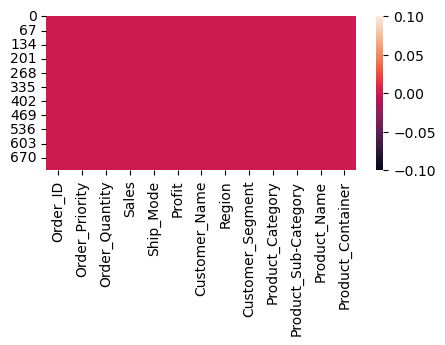

In [2]:
#Check for Null Values

fig, ax = plt.subplots(figsize = (5,2))
sns.heatmap(data.isnull())

# Numerical Columns

In [3]:
numeric_cols = ['Sales', 'Order_Quantity', 'Profit']

In [4]:
data[numeric_cols].describe()

,Sales,Order_Quantity,Profit
count,730.000000,730.000000,730.000000
mean,1502.777653,24.857534,207.479233
std,2893.936648,14.182970,878.631028
min,8.600000,1.000000,-4437.910000
25%,171.098375,13.000000,-77.132500
50%,438.700000,25.000000,0.035000
75%,1480.855000,37.000000,180.000000
max,27663.920000,50.000000,8417.570000


<AxesSubplot:>

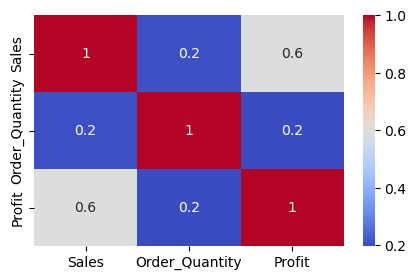

In [5]:
# Fill diagonal and upper half with NaNs
corr = data[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

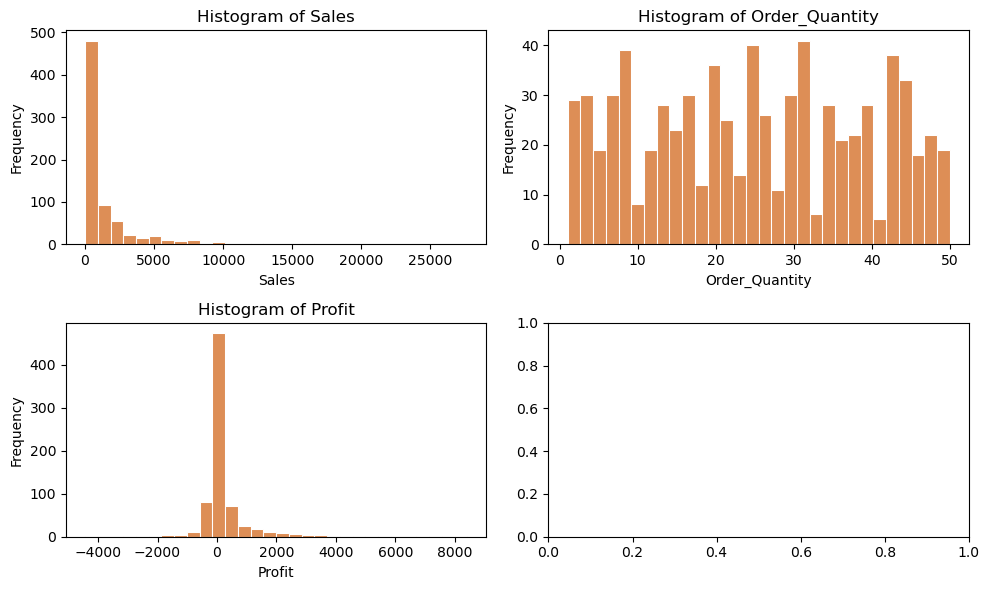

In [6]:
# Create subplots with adjusted layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each column and plot the histogram
for i, column in enumerate(['Sales', 'Order_Quantity', 'Profit']):
    ax = axes[i]
    sns.histplot(data[column], ax=ax, color = 'chocolate', edgecolor='white', bins = 30)  # Plot histogram with KDE
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Categorical Columns

## Creating a categorical column for profit that tells if the profit was positive or negative

<AxesSubplot:xlabel='Profit_Class', ylabel='count'>

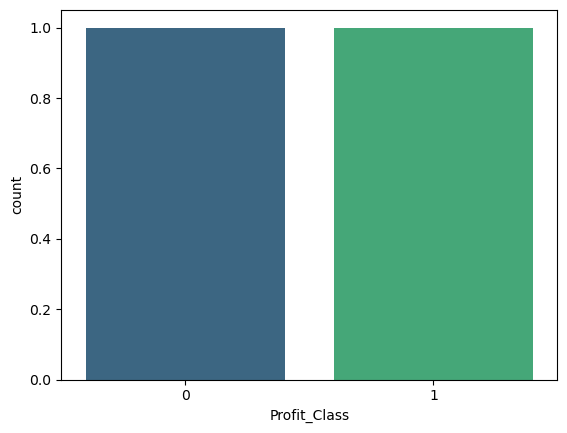

In [7]:
data['Profit_Class'] = (data['Profit'] > 0).astype(int)

sns.countplot(data['Profit_Class'].value_counts(), palette = 'viridis')

### The exploration of categorical columns are divided by those who have more or less than 100 categories, which create two groups of 7 and 2 columns respectively

In [8]:
# Filter columns of type 'object'
object_cols = data.select_dtypes(include=['object']).columns

# Count of unique values in object type columns
unique_counts = data[object_cols].nunique().sort_values(ascending = False)
print("Number of unique values in each object type column:")
print(unique_counts)

# Actual unique values in each column
object_cols_less_than_100 = [col for col in object_cols if col not in ['Product_Name', 'Customer_Name']]
unique_values = {col: data[col].unique() for col in object_cols_less_than_100}
print("\nUnique values in each column:")
print(unique_values)

Number of unique values in each object type column:
Product_Name            445
Customer_Name           173
Product_Sub-Category     15
Region                    6
Order_Priority            5
Customer_Segment          4
Product_Category          3
Product_Container         3
Ship_Mode                 2
dtype: int64

Unique values in each column:
{'Order_Priority': array(['High', 'Not Specified', 'Low', 'Medium', 'Critical'], dtype=object), 'Ship_Mode': array(['Express Air', 'Regular Air'], dtype=object), 'Region': array(['Nunavut', 'Northwest Territories', 'Atlantic', 'West', 'Ontario',
       'Prarie'], dtype=object), 'Customer_Segment': array(['Corporate', 'Consumer', 'Home Office', 'Small Business'],
      dtype=object), 'Product_Category': array(['Office Supplies', 'Furniture', 'Technology'], dtype=object), 'Product_Sub-Category': array(['Storage & Organization', 'Office Furnishings',
       'Chairs & Chairmats', 'Appliances', 'Copiers and Fax',
       'Office Machines', 'Tables', 

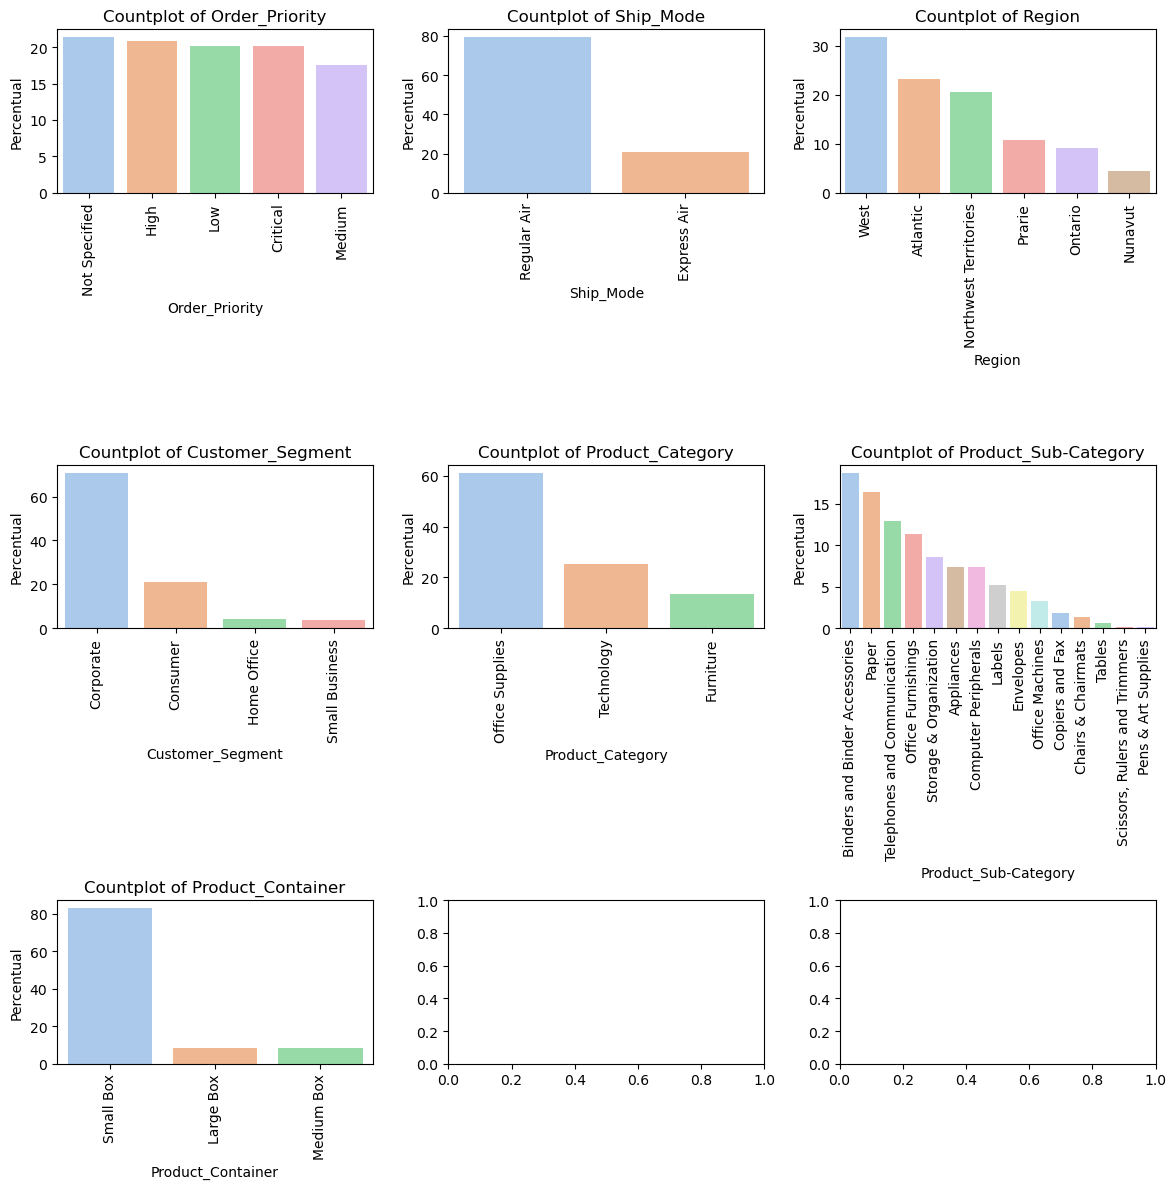

In [9]:
# Create subplots with adjusted layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each column and plot the countplot
for i, column in enumerate(object_cols_less_than_100):
    ax = axes[i]
    sns.countplot(x=column, data=data, ax=ax, palette = 'pastel', stat = 'percent', order = data[f'{column}'].value_counts().index)
                  #, hue = 'Region') #Uncomment for comparing values with other variables
    ax.set_title(f'Countplot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Percentual')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()

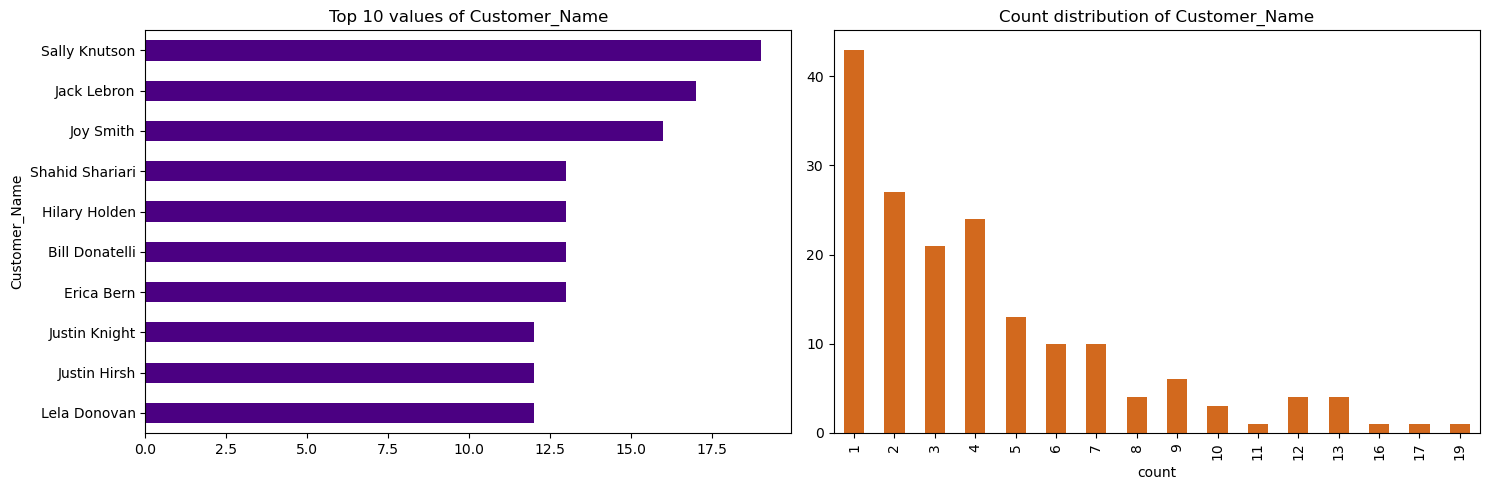

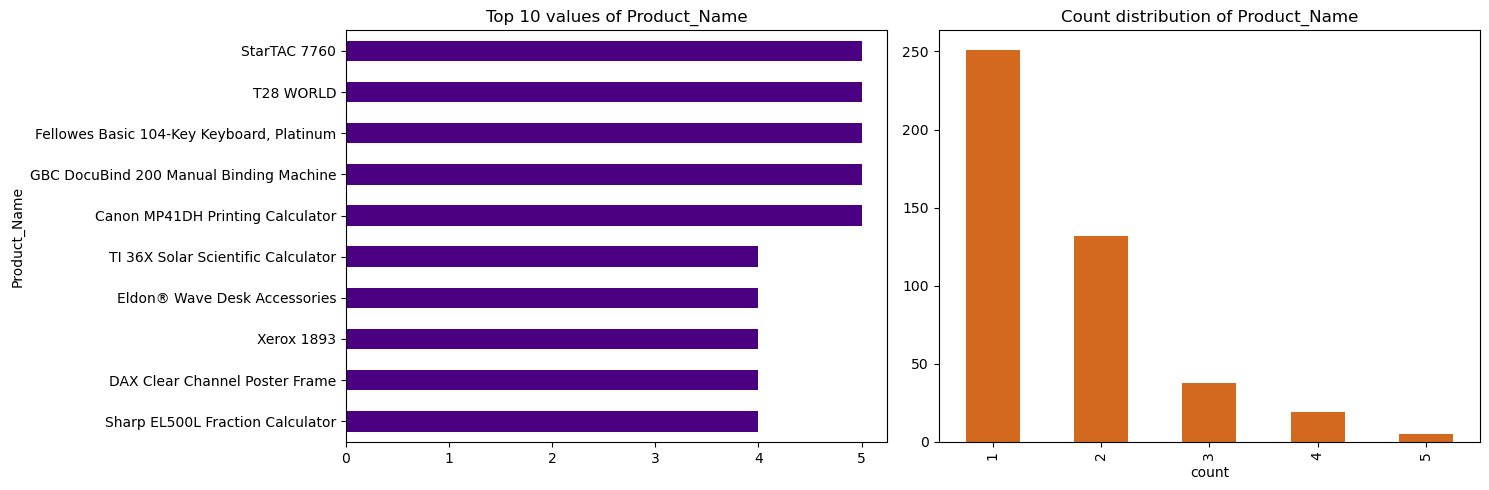

In [10]:
object_cols_higher_than_100 = ['Customer_Name','Product_Name']

# Assuming object_cols_higher_than_100 is defined earlier
for column in object_cols_higher_than_100:
    # Create a figure and axis for each column
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the first graph: horizontal bar plot
    data[column].value_counts().head(10).sort_values().plot(kind='barh', ax=axes[0], color='indigo')
    axes[0].set_title(f'Top 10 values of {column}')

    # Plot the second graph: count distribution
    data[column].value_counts().value_counts().sort_index().plot(kind='bar', ax=axes[1], color='chocolate')
    axes[1].set_title(f'Count distribution of {column}')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()


# Encoding

### For variables with more than 100 categories, we apply the Label Encoding by arbitrary value tresholds based on the Count Distribution Graph above / For variables with less than 100 categorias, we apply One Hot Encoding

### Categorial with more than 100 categories

In [11]:
# Calculate the counts of each customer
customer_counts = data['Customer_Name'].value_counts()

# Calculate the average and maximum counts
average_count = customer_counts.mean()
max_count = customer_counts.max()
print('Average: ', average_count)
print('Max: ', max_count)
# Create a dictionary to map the encoding
encoding_dict = {}

for customer, count in customer_counts.items():
    if count == 1:
        encoding_dict[customer] = 1
    elif 1 < count < average_count:
        encoding_dict[customer] = 2
    elif average_count <= count < max_count:
        encoding_dict[customer] = 3
    elif count == max_count:
        encoding_dict[customer] = 4

# Map the encoding to the Customer_Name column
data['Encoded_Customer'] = data['Customer_Name'].map(encoding_dict)

Average:  4.219653179190751
Max:  19


In [12]:
# Product Name goes from 1 to 5

# Calculate the counts of each product
product_counts = data['Product_Name'].value_counts()

# Create a dictionary to map the encoding
encoding_dict = {}

for product, count in product_counts.items():
    if count == 1:
        encoding_dict[product] = 1
    else:
        encoding_dict[product] = 2

# Map the encoding to the Product_Name column
data['Encoded_Product'] = data['Product_Name'].map(encoding_dict)

### Categorial with less than 100 categories

In [76]:
data_preprocessed = pd.get_dummies(data, columns = object_cols_less_than_100)

### Removing columns

In [77]:
data_preprocessed = data_preprocessed.set_index('Order_ID').drop(columns = ['Customer_Name', 'Product_Name'])

In [78]:
data_preprocessed

,Order_Quantity,Sales,Profit,Profit_Class,Encoded_Customer,Encoded_Product,Order_Priority_Critical,Order_Priority_High,Order_Priority_Low,Order_Priority_Medium,...,Product_Sub-Category_Office Machines,Product_Sub-Category_Paper,Product_Sub-Category_Pens & Art Supplies,"Product_Sub-Category_Scissors, Rulers and Trimmers",Product_Sub-Category_Storage & Organization,Product_Sub-Category_Tables,Product_Sub-Category_Telephones and Communication,Product_Container_Large Box,Product_Container_Medium Box,Product_Container_Small Box
Order_ID,,,,,,,,,,,,,,,,,,,,,
643,21,2781.82,-695.26,0,3,2,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
8995,35,3389.93,737.94,1,3,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
9127,7,2039.56,-329.49,0,2,2,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
26272,6,905.94,-4.19,0,3,2,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
36646,24,1168.15,-743.96,0,2,2,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56101,44,5347.13,1886.41,1,3,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1059,22,127.33,5.30,1,2,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1059,24,990.10,310.22,1,2,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


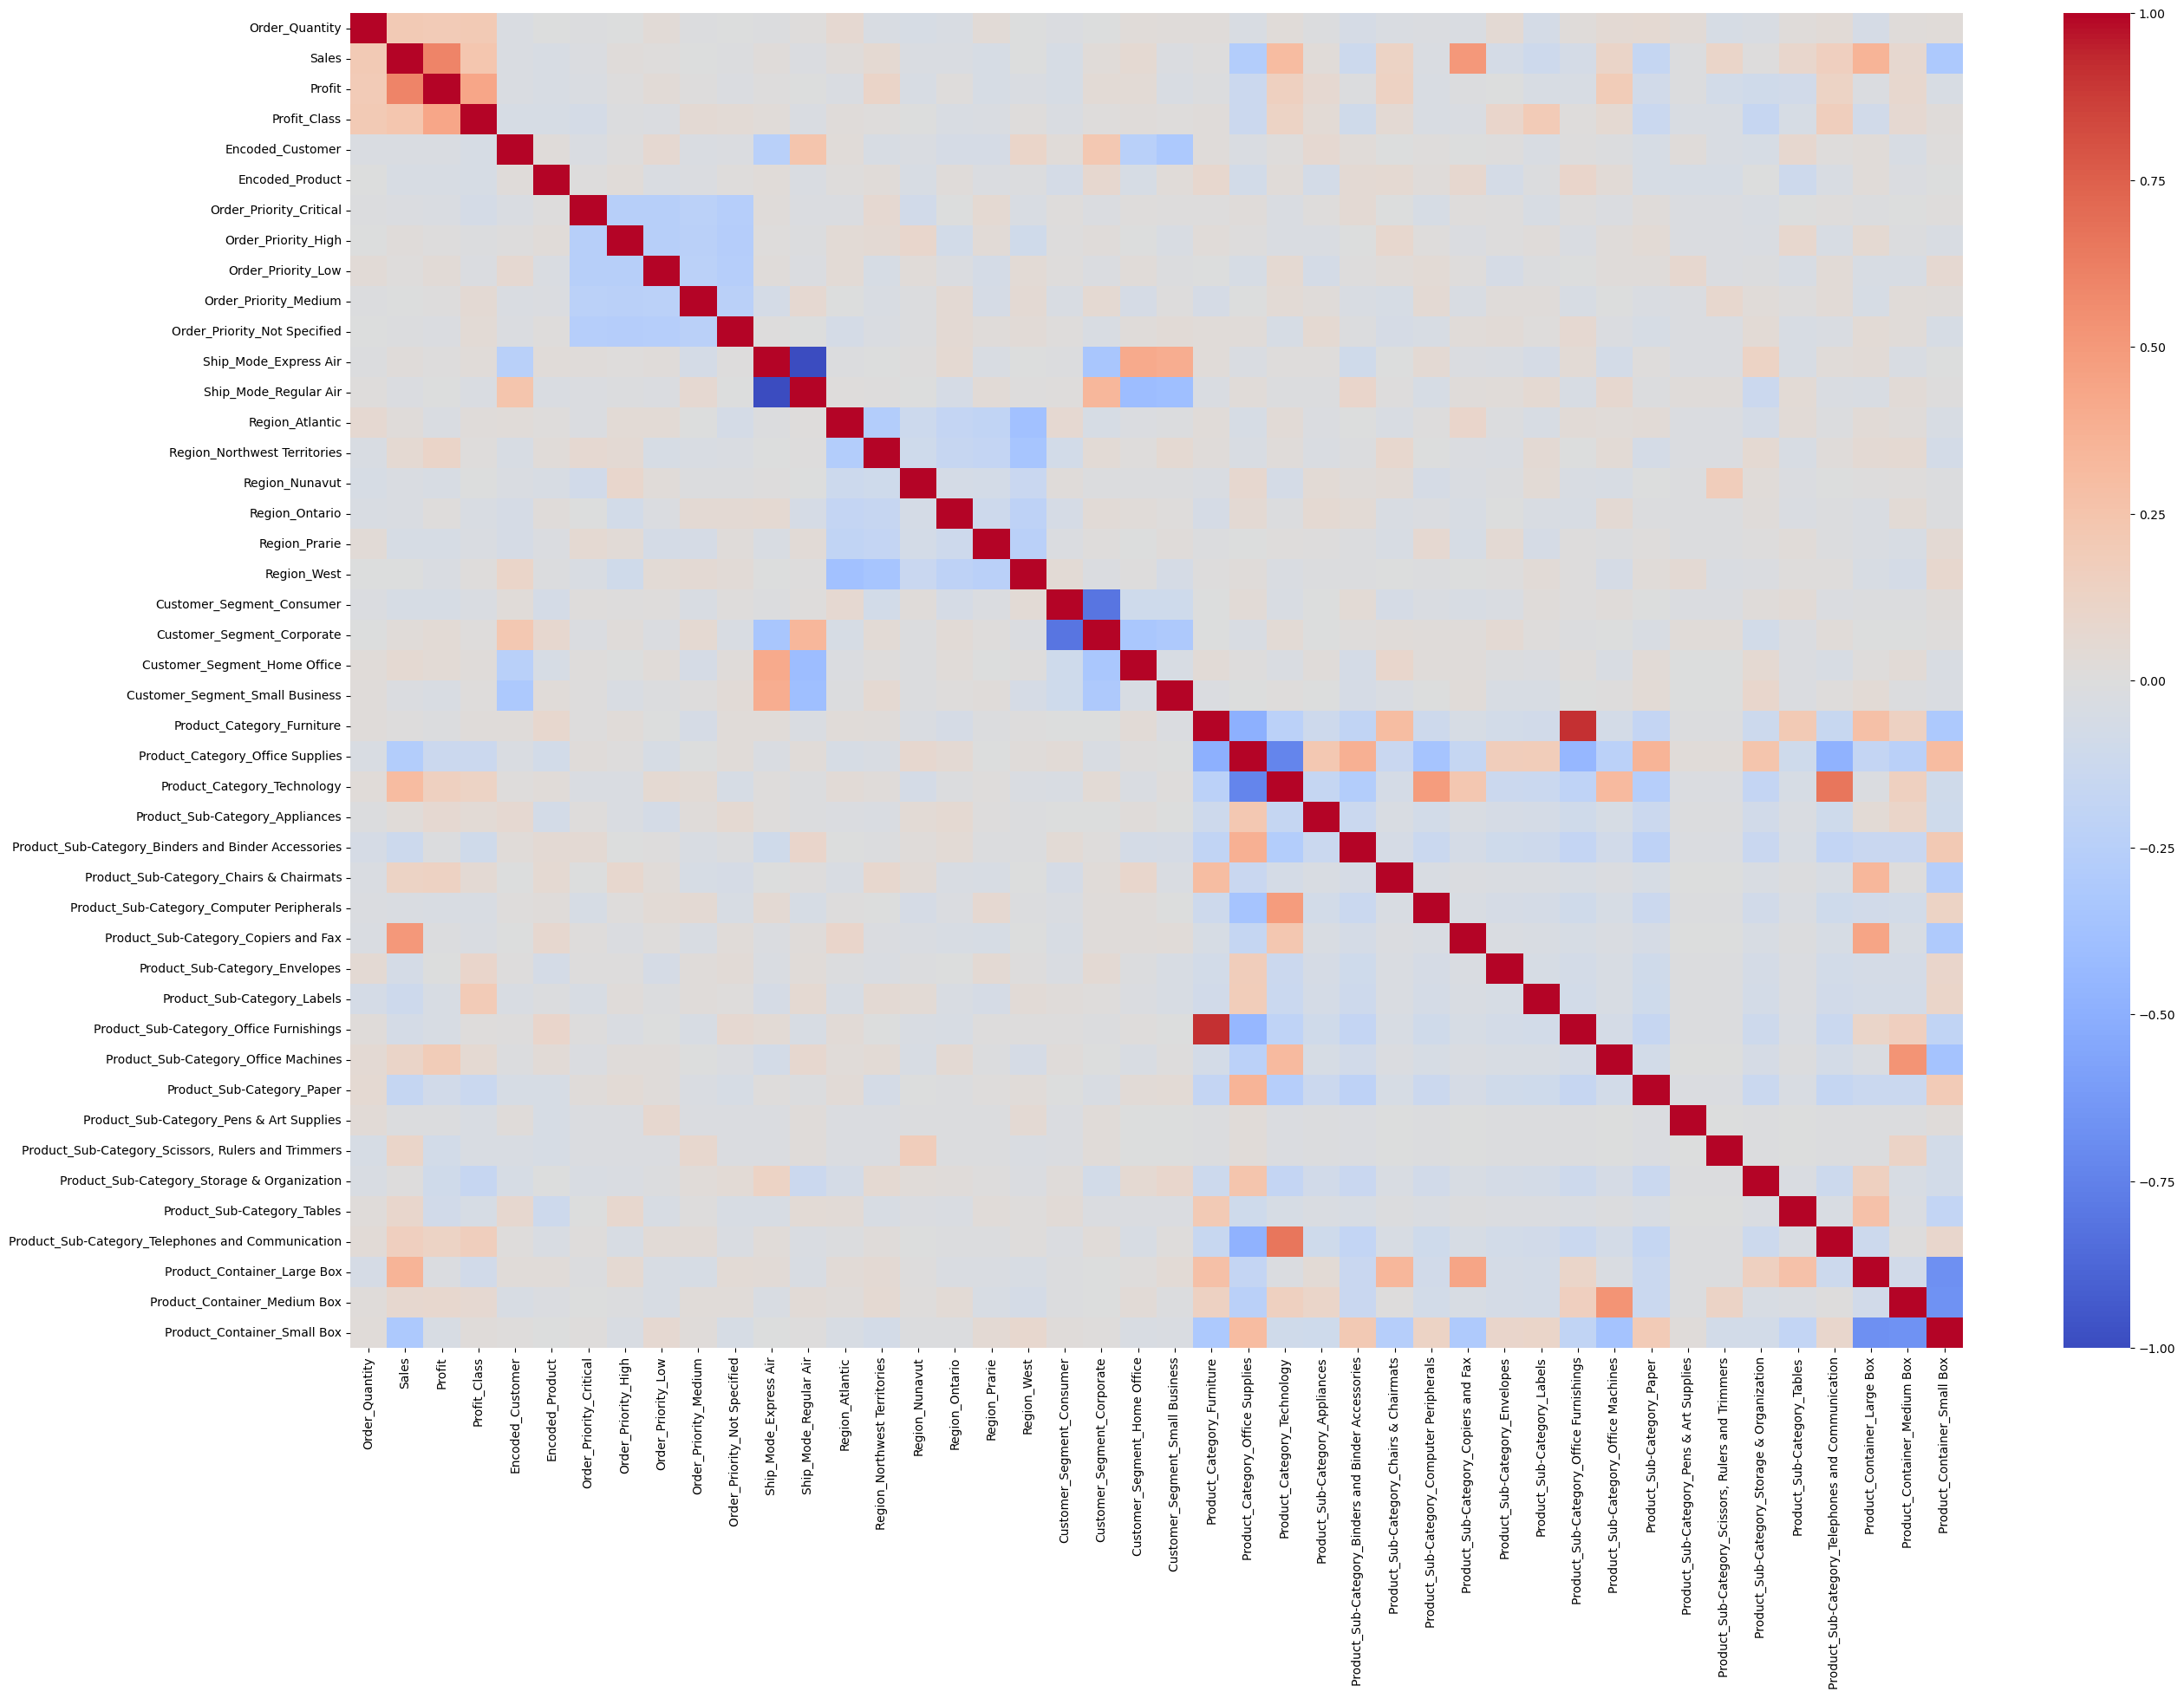

In [79]:
fig, ax = plt.subplots(figsize = (30,20))
sns.heatmap(data_preprocessed.corr(), cmap = 'coolwarm', ax = ax)
plt.show()

# Modeling

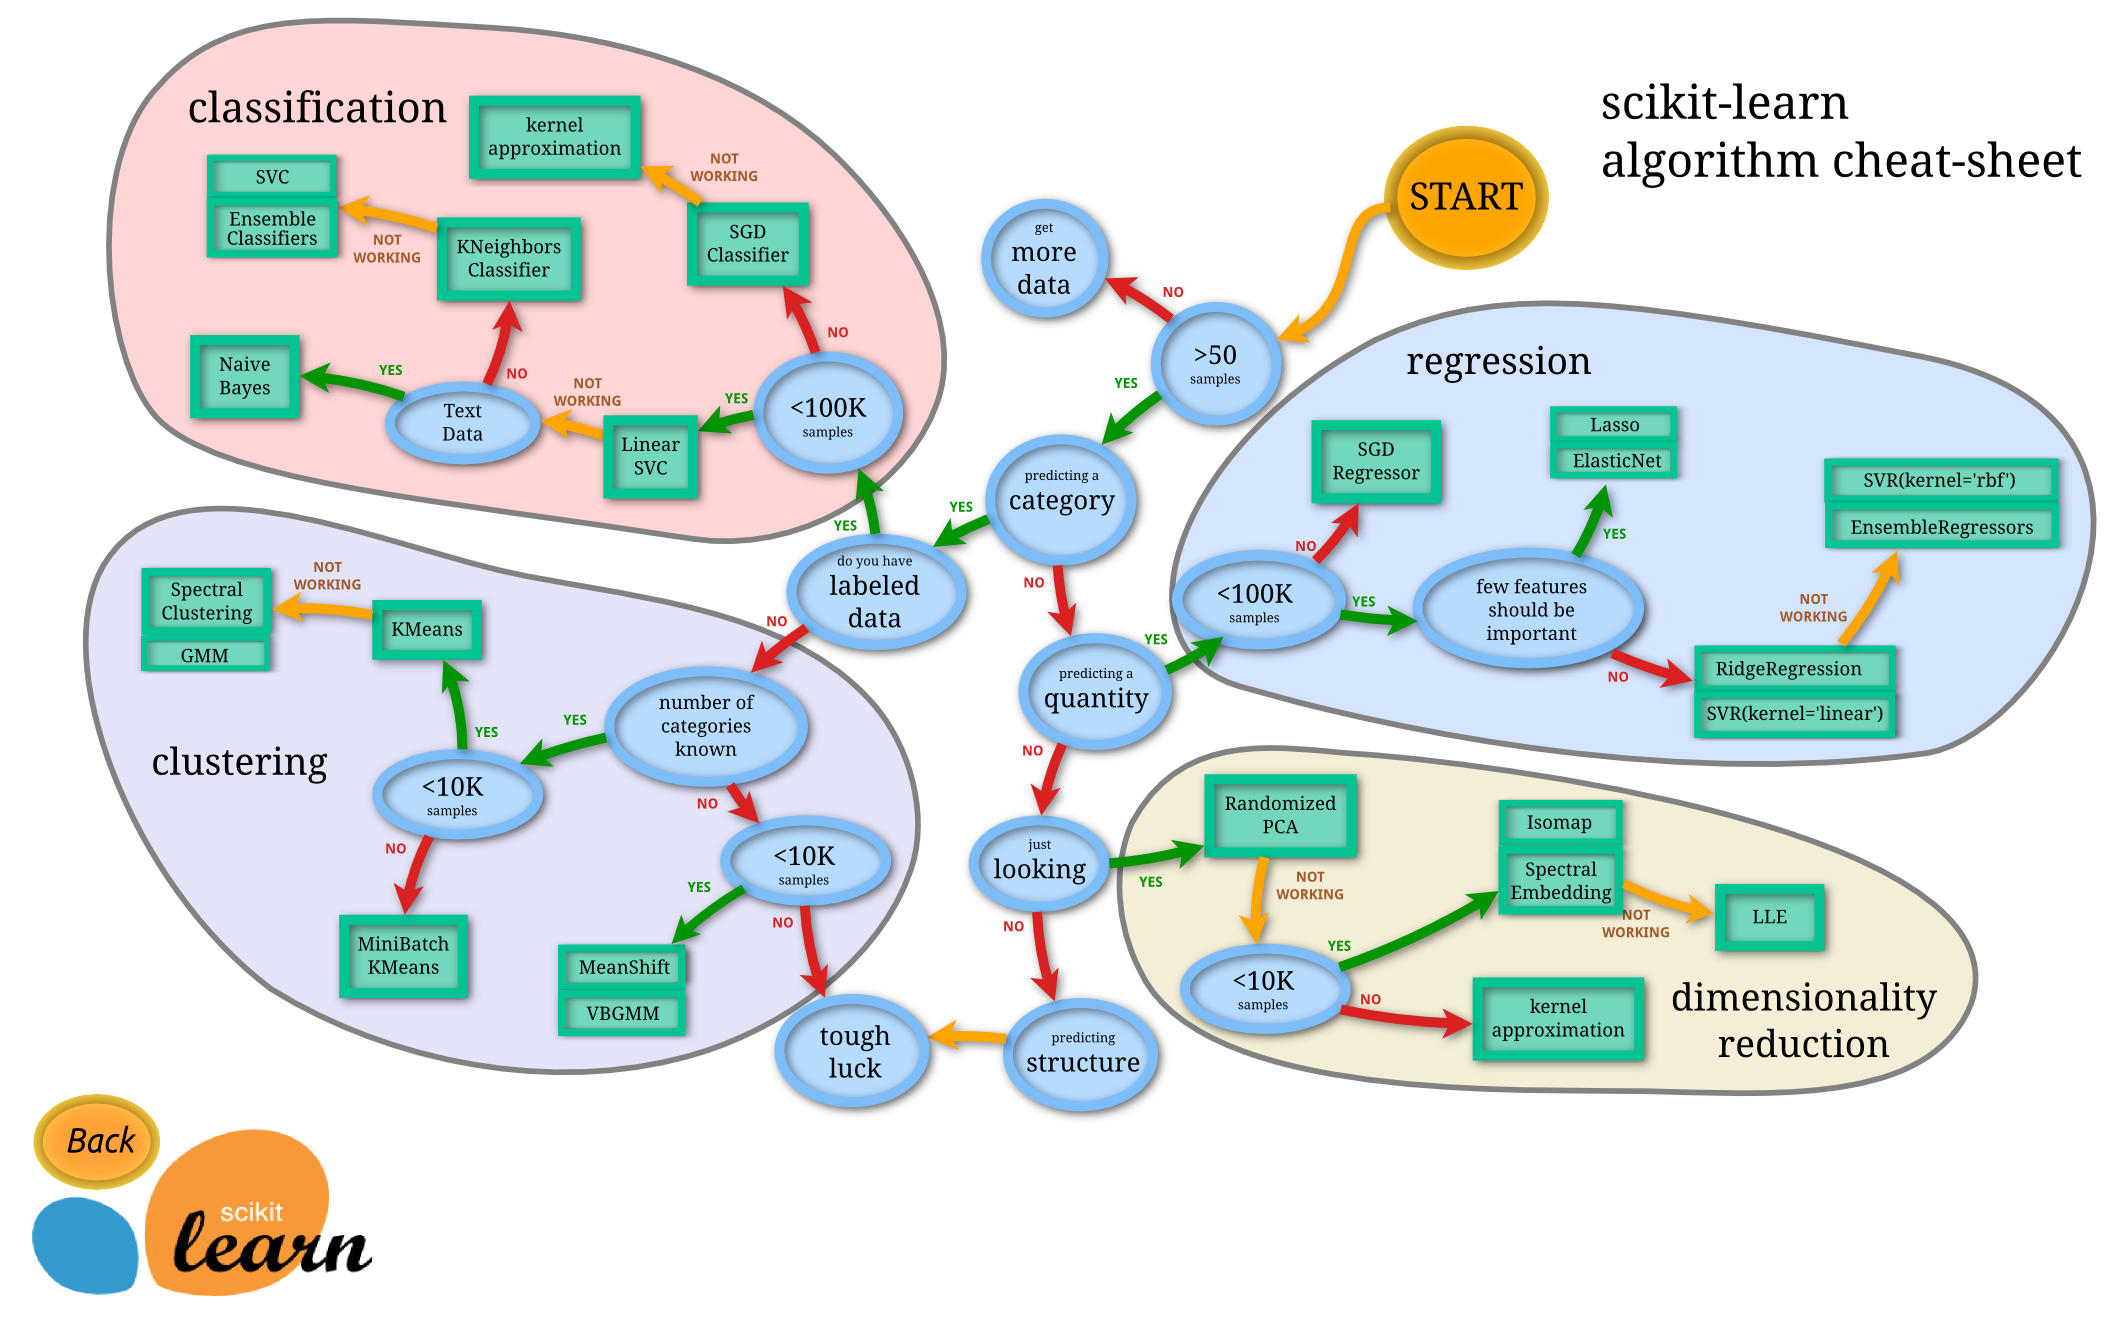

In [17]:
from IPython.display import Image
Image(r"C:\Users\vinicius.jacinto\Downloads\ml_map.png")

### Judging by the graph in SKLearn documentation, we have more than 50 samples and want to predict a quantity. Also, we have less than 100k samples and a high number of features should be important, so we'll use SVR in our example. It will fit well for our case

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

In [80]:
# Separate data into feature and target

X = data_preprocessed.drop(columns = 'Profit')
y = data_preprocessed.reset_index()['Profit']

In [81]:
# Remove High Correlated Columns

def correlated_columns(df, threshold=0.80):
    return (
        df.corr()
        .pipe(
            lambda df1: pd.DataFrame(
                np.tril(df1, k=-1),
                columns=df.columns,
                index=df.columns,
            )
        )
    .stack()
    .rename("pearson")
    .pipe(
        lambda s: s[
            s.abs() > threshold
        ].reset_index()
    )
        .query("level_0 not in level_1")
    )

cr =correlated_columns(X)
X = X.drop(columns = cr['level_0'])

print('Removed columns with correlation higher than 0.8:', cr['level_0'])

Removed columns with correlation higher than 0.8: 0                      Ship_Mode_Regular Air
1                 Customer_Segment_Corporate
2    Product_Sub-Category_Office Furnishings
Name: level_0, dtype: object


In [82]:
# Divide data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 1)

In [86]:
# Creating SelectKBest object with f_regression scoring function
selector = SelectKBest(score_func=f_regression, k=20)  # Select the top 20 features

# Fitting the selector to the training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Getting the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected feature indices
print("Selected Feature Indices:", selected_indices)


# Filter the X_train and X_test
X_train_filtered = X_train.iloc[:,selected_indices]
X_test_filtered = X_test.iloc[:,selected_indices]

Selected Feature Indices: [ 0  1  2  5 12 13 17 18 21 22 23 25 29 30 31 33 34 35 36 37]


In [87]:
# Importing necessary libraries
import numpy as np
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Creating and fitting the SVR model with a linear kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_filtered, y_train)

# Making predictions
y_pred = svr_linear.predict(X_test_filtered)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 523621.27232719515


In [48]:
import numpy as np

# Assuming you have y_test and y_pred already defined

# Calculate the percentage difference between y_pred and y_test
percentage_difference = np.abs((y_pred - y_test) / y_test) * 100

# Count the number of satisfactory predictions (where percentage difference is less than 20%)
satisfactory_predictions = np.sum(percentage_difference < 20)

# Calculate the percentage of satisfactory predictions
percentage_satisfactory = (satisfactory_predictions / len(y_test)) * 100

print("Percentage of predictions with less than 20% difference from actual value:", percentage_satisfactory, "%")

Percentage of predictions with less than 20% difference from actual value: 35.15981735159817 %


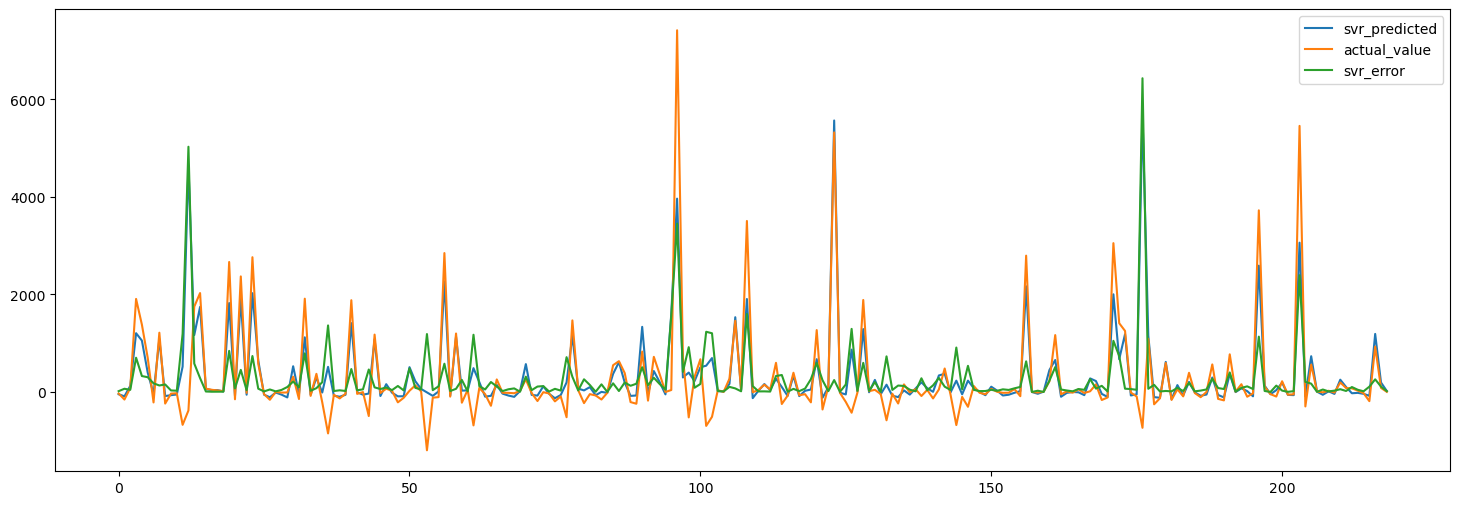

In [49]:
# Simple graph cross validation of the model

fig, ax = plt.subplots(figsize = (18,6))

result_df = pd.DataFrame([])
result_df['svr_predicted'] = y_pred
result_df['actual_value'] = y_test.values
result_df['svr_error'] = abs(result_df['actual_value'] - result_df['svr_predicted'])

result_df.plot(kind = 'line', ax = ax)
plt.show()

### Most important conclusions: Our model has a 35,15% change that it will predict a value that is at least 20% around our actual value. Also, it is greater at predicting positive profits rather than negative ones

### Suggestions: For further studies and improvments I would suggest going through other Machine Learning alghoritms like Ridge Regression, Linear Regression, other String Vector Machines and comparing all of them for a better result, also reinforcing the feature engineering part of the code

### Also, we could create an additional model to predict a label using Logistic Regression or Random Forest Classifier to tell us whether the profit will be 1 (positive) or 0 (negative). This model would give us a higher precision rate and can be used in combination with a value prediction model for best daily interpretation and decision making